# Prerequisites

### Know how to specifiy array elements using indexing (e.g. y[3], array[:,0])

### Know how to draw some basic plots

# Import required modules

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

# A particle in a periodic box

### A particle's state in a periodic box is described $\psi$,
### which satisfies a periodic boundary condition: $\psi(x+L)=\psi(x)$

### Thus, we will only consider $\psi$ values at $x_{min}=x_{0},\,x_1,\,...,\,x_{N_{x}-2},\,x_{N_{x}-1}=x_{max}-\Delta{x}$
### where $x_{max}=x_{min}+L$, thus $\psi(x_{max})=\psi(x_{min}+L)=\psi(x_{min})$

## Configure spatial grid

In [2]:
## Parameters for spatial grid (specified by 'x', in this 1D model)
N_x = 50   # number of grid points
delta_x = 0.1   # grid interval (assuming equi-distanced grid)
x_min = 0   # lower bound of potential well (it may be different from minimum value of spatial grid)

### $x_{0}=x_{min}+\Delta{x}$

In [3]:
x_0 = x_min

### $x_{n} = x_0 + n\Delta{x}$ where $n=0,1,2,...,N_{x}-1$

In [4]:
n = np.arange(N_x)  # n = [0, 1, 2, ..., N_x - 1]
x_array = x_0 + n * delta_x

### $x_{N_{x}-1}=x_{max}-\Delta{x}$

In [5]:
x_max = x_array[N_x - 1] + delta_x

### $box\,size = x_{max} - x_{min}$

In [6]:
box_size = x_max - x_min

## Configure potential function (array)

In [7]:
## Set potential energy array in position representation
potential_energy_array = np.zeros(N_x)

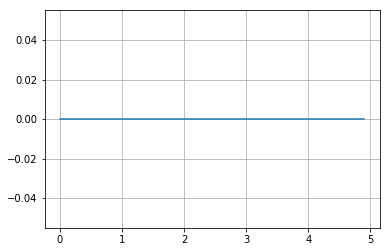

In [8]:
plt.plot(x_array, potential_energy_array)

# Construct Hamiltonian matrix

In [9]:
matrix_shape = [N_x, N_x]  # Think about why the matrix is N_x by N_x matrix

## Construct Kinetic Energy matrix (KE)
#### Note that there are two '1' at upper right and lower left corner to represent the periodic boundary condition

\begin{equation}
KE
\approx
-\frac{\hbar^2}{2m}
\frac{1}{\Delta{x}^2}
\begin{bmatrix}
    -2 & 1 & 0 & \dots & 0 & 0 & 1\\
    1 & -2 & 1 & \dots & 0 & 0 &0\\
    0 & 1 & -2 & \dots & 0 & 0 & 0\\
    \vdots & \vdots & \vdots & \vdots & \ddots & \ddots & \vdots \\
    0 & 0 & 0 & \dots & -2 & 1 & 0 \\
    0 & 0 & 0 & \dots & 1 & -2 & 1 \\
    1 & 0 & 0 & \dots & 0 & 1 & -2
\end{bmatrix}
\end{equation}

In [10]:
KE = np.zeros(matrix_shape)  # kinetic_energy_matrix

# Using atomic unit system
hbar = 1
m = 1

# Caclulate coefficient
coefficient = - hbar**2 / (2 * m) * 1.0 / (delta_x**2)

## Fill diagonal elements
diagonal_element = - 2.0 * coefficient
for i in range(N_x):
    j = i
    KE[i,j] = diagonal_element

## Fill offdiagonal elements
off_diagonal_element = 1.0 * coefficient
# Fill lower-offdiagonal
for i in range(1,N_x):
    j = i - 1
    KE[i,j] = off_diagonal_element

# Fill upper-offdiagonal
for i in range(0,N_x-1):
    j = i + 1
    KE[i,j] = off_diagonal_element

In [11]:
## Add '1' at upper right and lower left corner to represent the periodic boundary condition
KE[0,N_x-1] = 1.0 * coefficient
KE[N_x-1,0] = 1.0 * coefficient

#### Check result

In [12]:
KE

array([[100., -50.,   0., ...,   0.,   0., -50.],
       [-50., 100., -50., ...,   0.,   0.,   0.],
       [  0., -50., 100., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 100., -50.,   0.],
       [  0.,   0.,   0., ..., -50., 100., -50.],
       [-50.,   0.,   0., ...,   0., -50., 100.]])

## Construct potential energy matrix

In [13]:
PE = np.zeros(matrix_shape)  # potential_energy_matrix

# fill diagonal
for i in range(N_x):
    PE[i,i] = potential_energy_array[i]

#### Check result

In [14]:
PE

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Construct Hamiltonian matrix

In [15]:
hamiltonian = KE + PE

In [16]:
hamiltonian

array([[100., -50.,   0., ...,   0.,   0., -50.],
       [-50., 100., -50., ...,   0.,   0.,   0.],
       [  0., -50., 100., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 100., -50.,   0.],
       [  0.,   0.,   0., ..., -50., 100., -50.],
       [-50.,   0.,   0., ...,   0., -50., 100.]])

# Obtain eigenenergy and eigenvectors
### We use numpy.linalg.eigh() function
### This funciton returns the eigenvalues and eigenvectors of a Hermitian matrix

In [17]:
eigen_values, eigen_vectors = np.linalg.eigh(hamiltonian)

#### Shape of the array of eigenvalues

In [18]:
eigen_values.shape

(50,)

#### Shape of tha 2D array of eigenvectors

In [19]:
eigen_vectors.shape

(50, 50)

In [20]:
eigen_values[0]   # First eigenvalues

2.9692540559209607e-14

In [21]:
eigen_vectors[:,0]   # First eigenvector

array([0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136])

# Plot eigenvector

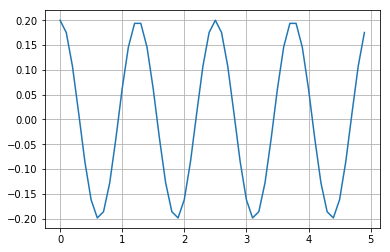

In [22]:
plt.plot(x_array, eigen_vectors[:,7])